In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
df = pd.read_parquet("ngao.parquet")
df


,WfeRms,SegmentWfeRms,SegmentPiston
0,[1.1366469152562786e-06],"[8.932390755944652e-07, 1.0550861588853877e-06...","[-2.028438984780223e-06, -1.6327965113305254e-..."
1,[1.1366596481821034e-06],"[8.930126114137238e-07, 1.0549663329584291e-06...","[-2.028787321251002e-06, -1.6325268461514497e-..."
2,[1.1366714716132265e-06],"[8.927871704145218e-07, 1.0548596947046462e-06...","[-2.029141796811018e-06, -1.632263320061611e-0..."
3,[1.1366819308022968e-06],"[8.925605925469426e-07, 1.054759309226938e-06,...","[-2.0295035483286483e-06, -1.631993768569373e-..."
4,[1.1366902299414505e-06],"[8.92340722202789e-07, 1.054648237186484e-06, ...","[-2.029855295404559e-06, -1.6317272866217536e-..."
...,...,...,...
7995,[1.0993908006184938e-07],"[8.838494380825068e-08, 8.471272394672269e-08,...","[1.070112443102289e-09, 5.9935305607439204e-09..."
7996,[1.0982152076621787e-07],"[8.835132803142187e-08, 8.480483870698663e-08,...","[1.065470045524819e-09, 6.091544157982298e-09,..."
7997,[1.1036954106202757e-07],"[8.871524670439612e-08, 8.522875560856846e-08,...","[1.1643679354023106e-09, 6.7352941002241096e-0..."
7998,[1.1085709417102407e-07],"[8.917057670032591e-08, 8.56817976568891e-08, ...","[1.286295181479602e-09, 7.419707070965842e-09,..."


In [45]:
t = np.arange(df.shape[0])/8000
seg_piston = np.vstack(df["SegmentPiston"])*1e9
wfe_rms = np.vstack(df["WfeRms"])*1e9
seg_wfe_rms = np.vstack(df["SegmentWfeRms"])*1e9


Text(0, 0.5, 'Segment piston [nm]')

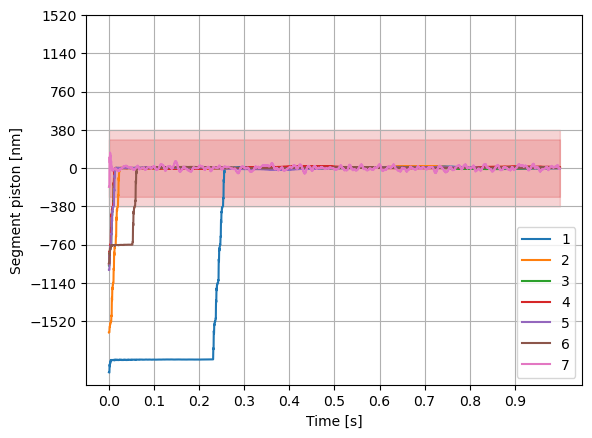

In [46]:
fig,ax = plt.subplots()
ax.plot(t,seg_piston)
ax.legend(range(1,8))
ax.fill_between(t,-380,380,color="C3",alpha=0.2)
ax.fill_between(t, -0.375 * 760, 0.375 * 760, color="C3", alpha=0.2)
ax.grid()
ax.set_xticks(np.arange(0,1,0.1))
ax.set_yticks(np.arange(-4,5)*380)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Segment piston [nm]")

#ax.set_xlim(0, 0.2)
#ax.set_ylim(-50,50)


(-2000.0, 500.0)

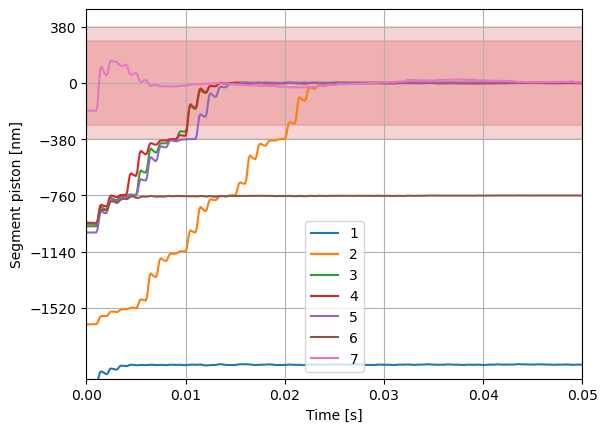

In [47]:
fig,ax = plt.subplots()
ax.plot(t,seg_piston)
ax.legend(range(1,8))
ax.fill_between(t,-380,380,color="C3",alpha=0.2)
ax.fill_between(t, -0.375 * 760, 0.375 * 760, color="C3", alpha=0.2)
ax.grid()
ax.set_xticks(np.arange(0,1,0.01))
ax.set_yticks(np.arange(-4,5)*380)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Segment piston [nm]")

ax.set_xlim(0, 0.05)
ax.set_ylim(-2000,500)


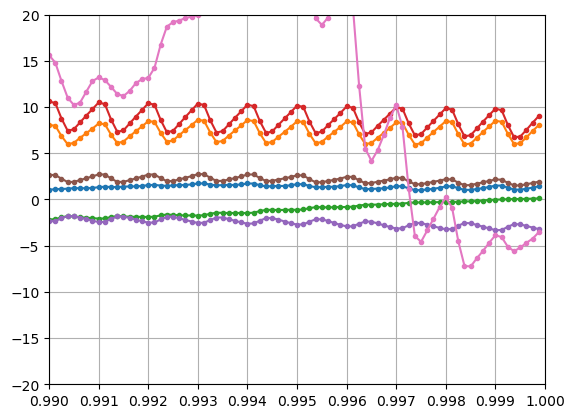

In [48]:
fig,ax = plt.subplots()
ax.plot(t,seg_piston,'.-')
ax.grid()
ax.set_xlim(1-0.01,1)
ax.set_ylim(-20,20)
ax.set_xticks(np.arange(0.99,1,1e-3));

(0.0, 500.0)

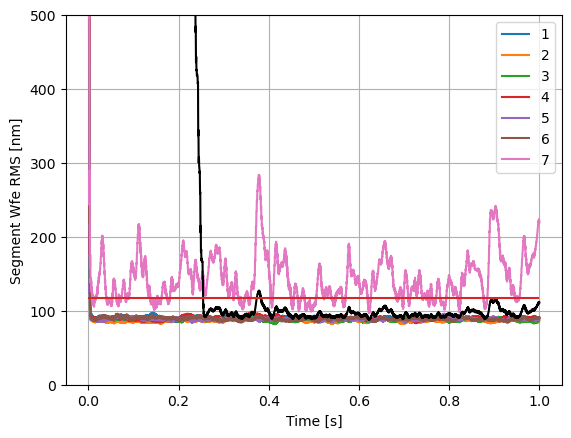

In [49]:
fig, ax = plt.subplots()
ax.plot(t, seg_wfe_rms)
ax.legend(range(1, 8))
ax.plot(t, wfe_rms,"k")
ax.hlines(117,0,1,'C3')
ax.grid()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Segment Wfe RMS [nm]")
#ax.set_xlim([0,0.1])
ax.set_ylim([0,500])
#ax.set_xticks(np.arange(0,1,0.1));

In [50]:
wfe_rms[t>0.5].mean()

96.52384767180372

(50.0, 300.0)

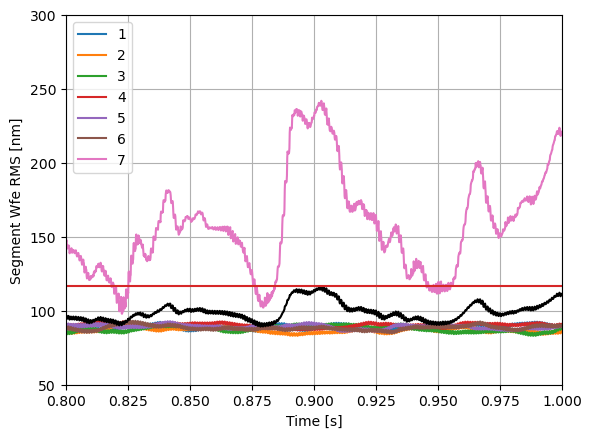

In [51]:
fig, ax = plt.subplots()
ax.plot(t, seg_wfe_rms)
ax.legend(range(1, 8))
ax.plot(t, wfe_rms,"k")
ax.hlines(117,0,1,'C3')
ax.grid()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Segment Wfe RMS [nm]")
ax.set_xlim(1-0.2, 1)
ax.set_ylim(50, 300)  
# ax.set_ylim([0,500])
#ax.set_xticks(np.arange(0,1,0.1));

(0.0, 0.15)

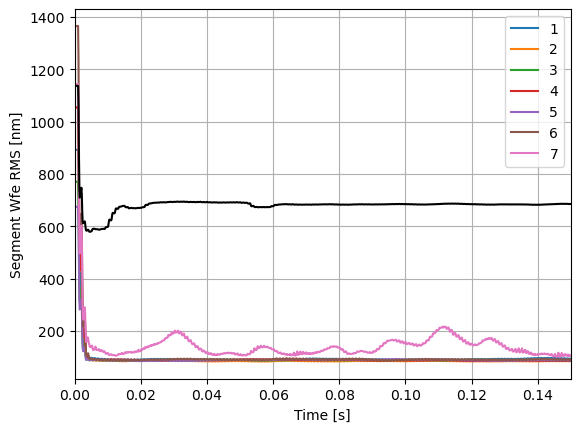

In [52]:
fig, ax = plt.subplots()
ax.plot(t, seg_wfe_rms)
ax.legend(range(1, 8))
ax.plot(t, wfe_rms,"k")
ax.grid()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Segment Wfe RMS [nm]")
ax.set_xlim([0,0.15])
#ax.set_ylim([0,500])
#ax.set_xticks(np.arange(0,1,0.1));